In [224]:
%%capture
# cell for installing necessary packages
# !pip install polars

In [225]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

from scipy.stats import kurtosis, skew

### About Data

In [226]:
aisles_df = pl.read_csv("../data/aisles.csv")
departments_df = pl.read_csv("../data/departments.csv")
order_prior_df = pl.read_csv("../data/order_products__prior.csv")
order_train_df = pl.read_csv("../data/order_products__train.csv")
orders_df = pl.read_csv("../data/orders.csv")
products_df = pl.read_csv("../data/products.csv")

In [227]:
aisles_df.head()

aisle_id,aisle
i64,str
1,"""prepared soups salads"""
2,"""specialty cheeses"""
3,"""energy granola bars"""
4,"""instant foods"""
5,"""marinades meat preparation"""


In [228]:
aisles_df.describe()

statistic,aisle_id,aisle
str,f64,str
"""count""",134.0,"""134"""
"""null_count""",0.0,"""0"""
"""mean""",67.5,null
"""std""",38.826537,null
"""min""",1.0,"""air fresheners candles"""
"""25%""",34.0,null
"""50%""",68.0,null
"""75%""",101.0,null
"""max""",134.0,"""yogurt"""


In [229]:
departments_df.head()

department_id,department
i64,str
1,"""frozen"""
2,"""other"""
3,"""bakery"""
4,"""produce"""
5,"""alcohol"""


In [230]:
departments_df.describe()

statistic,department_id,department
str,f64,str
"""count""",21.0,"""21"""
"""null_count""",0.0,"""0"""
"""mean""",11.0,null
"""std""",6.204837,null
"""min""",1.0,"""alcohol"""
"""25%""",6.0,null
"""50%""",11.0,null
"""75%""",16.0,null
"""max""",21.0,"""snacks"""


In [231]:
order_prior_df.head()

order_id,product_id,add_to_cart_order,reordered
i64,i64,i64,i64
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0


In [232]:
order_prior_df.describe()

statistic,order_id,product_id,add_to_cart_order,reordered
str,f64,f64,f64,f64
"""count""",3.2434489e7,3.2434489e7,3.2434489e7,3.2434489e7
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",1.7107e6,25576.337535,8.351076,0.589697
"""std""",987300.696453,14096.68909,7.126671,0.491889
"""min""",2.0,1.0,1.0,0.0
"""25%""",855943.0,13530.0,3.0,0.0
"""50%""",1.711048e6,25256.0,6.0,1.0
"""75%""",2.565514e6,37935.0,11.0,1.0
"""max""",3.421083e6,49688.0,145.0,1.0


In [233]:
order_train_df.head()

order_id,product_id,add_to_cart_order,reordered
i64,i64,i64,i64
1,49302,1,1
1,11109,2,1
1,10246,3,0
1,49683,4,0
1,43633,5,1


In [234]:
order_train_df.describe()

statistic,order_id,product_id,add_to_cart_order,reordered
str,f64,f64,f64,f64
"""count""",1.384617e6,1.384617e6,1.384617e6,1.384617e6
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",1.7063e6,25556.235729,8.758044,0.598594
"""std""",989732.648868,14121.272449,7.423936,0.490183
"""min""",1.0,1.0,1.0,0.0
"""25%""",843370.0,13380.0,3.0,0.0
"""50%""",1.70188e6,25298.0,7.0,1.0
"""75%""",2.568023e6,37940.0,12.0,1.0
"""max""",3.42107e6,49688.0,80.0,1.0


In [235]:
orders_df.head()

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
i64,i64,str,i64,i64,i64,f64
2539329,1,"""prior""",1,2,8,null
2398795,1,"""prior""",2,3,7,15.0
473747,1,"""prior""",3,3,12,21.0
2254736,1,"""prior""",4,4,7,29.0
431534,1,"""prior""",5,4,15,28.0


In [236]:
orders_df.describe()

statistic,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
str,f64,f64,str,f64,f64,f64,f64
"""count""",3.421083e6,3.421083e6,"""3421083""",3.421083e6,3.421083e6,3.421083e6,3.214874e6
"""null_count""",0.0,0.0,"""0""",0.0,0.0,0.0,206209.0
"""mean""",1.710542e6,102978.208059,null,17.154858,2.776219,13.452015,11.114836
"""std""",987581.739823,59533.717794,null,17.733164,2.046829,4.226088,9.206737
"""min""",1.0,1.0,"""prior""",1.0,0.0,0.0,0.0
"""25%""",855272.0,51394.0,null,5.0,1.0,10.0,4.0
"""50%""",1.710542e6,102689.0,null,11.0,3.0,13.0,7.0
"""75%""",2.565813e6,154385.0,null,23.0,5.0,16.0,15.0
"""max""",3.421083e6,206209.0,"""train""",100.0,6.0,23.0,30.0


In [237]:
products_df.head()

product_id,product_name,aisle_id,department_id
i64,str,i64,i64
1,"""Chocolate Sandwich Cookies""",61,19
2,"""All-Seasons Salt""",104,13
3,"""Robust Golden Unsweetened Oolo…",94,7
4,"""Smart Ones Classic Favorites M…",38,1
5,"""Green Chile Anytime Sauce""",5,13


In [238]:
products_df.describe()

statistic,product_id,product_name,aisle_id,department_id
str,f64,str,f64,f64
"""count""",49688.0,"""49688""",49688.0,49688.0
"""null_count""",0.0,"""0""",0.0,0.0
"""mean""",24844.5,null,67.769582,11.728687
"""std""",14343.834425,null,38.316162,5.85041
"""min""",1.0,"""#2 Coffee Filters""",1.0,1.0
"""25%""",12423.0,null,35.0,7.0
"""50%""",24845.0,null,69.0,13.0
"""75%""",37266.0,null,100.0,17.0
"""max""",49688.0,"""with a Splash of Pineapple Coc…",134.0,21.0


### Key Objective
The goal is to predict which products will be in a user's next order (test set) based on their past purchase patterns.

#### File Descriptions

**`aisles.csv`**
- **Columns:**
  - `aisle_id`: Unique identifier for an aisle.
  - `aisle`: Name of the aisle (e.g., "prepared soups salads").
- **Purpose:**  
  Helps categorize products into specific aisles, aiding in identifying customer preferences at a granular level.

**`departments.csv`**
- **Columns:**
  - `department_id`: Unique identifier for a department.
  - `department`: Name of the department (e.g., "frozen").
- **Purpose:**  
  Broadly categorizes products by department, which can help analyze purchasing patterns at a higher level.

**`order_products__*.csv`**
- **Files:**
  - `order_products__prior.csv`: Past order details for all users.
  - `order_products__train.csv`: Ground truth for training predictions on product reordering.
- **Columns:**
  - `order_id`: Unique identifier for an order.
  - `product_id`: Unique identifier for a product.
  - `add_to_cart_order`: Sequence in which the product was added to the cart.
  - `reordered`: Binary (1 if the product was reordered, 0 otherwise).
- **Purpose:**  
  Details about the products purchased in each order, including reordering behavior, which is key to prediction.

**`orders.csv`**
- **Columns:**
  - `order_id`: Unique identifier for an order.
  - `user_id`: Unique identifier for a user.
  - `eval_set`: Specifies the dataset the order belongs to (`prior`, `train`, `test`).
  - `order_number`: Order sequence number for the user.
  - `order_dow`: Day of the week the order was placed (0-6).
  - `order_hour_of_day`: Hour the order was placed (0-23).
  - `days_since_prior_order`: Days since the previous order (missing for the first order).
- **Purpose:**  
  Provides a timeline of user orders and metadata for temporal analysis and modeling.

**`products.csv`**
- **Columns:**
  - `product_id`: Unique identifier for a product.
  - `product_name`: Name of the product (e.g., "Chocolate Sandwich Cookies").
  - `aisle_id`: Identifier linking the product to an aisle.
  - `department_id`: Identifier linking the product to a department.
- **Purpose:**  
  Links products to aisles and departments, enabling hierarchical grouping.

**`sample_submission.csv`**
- **Columns:**
  - `order_id`: Identifier for a test set order.
  - `products`: Placeholder for predicted product IDs (comma-separated) for each order.
- **Purpose:**  
  Template for submission format.

In [239]:
orders_df = orders_df.with_columns(
    pl.when(pl.col("eval_set") == "prior").then(0)
    .when(pl.col("eval_set") == "train").then(1)
    .when(pl.col("eval_set") == "test").then(2)
    .otherwise(pl.col("eval_set")).cast(pl.Int32).alias("eval_set")
)

In [240]:
aisles_df.select(pl.col(pl.Float64) | pl.col(pl.Int64))

shape: (0, 0)
┌┐
╞╡
└┘

In [241]:
# a function to understand the data

def get_stats(df):
  n_rows = df.shape[0]
  columns = df.columns
  dtypes = df.dtypes
  total_cnt = df.select(pl.col("*").drop_nulls().count())
  null_cnt = df.select([
        (n_rows - pl.col(col).drop_nulls().count()).alias(f"{col}_null_count")
        for col in df.columns
    ])
  missing_perc = null_cnt.with_columns([
        (pl.col(col) / n_rows * 100).alias(f"{col}_missing_percentage")
        for col in null_cnt.columns
    ])
  unq_vals = {col: df[col].n_unique() for col in df.columns}
  total_unqs = {col: df[col].unique().to_list() for col in df.columns}
  numeric_cols = df.select(pl.col(pl.Int64) | pl.col(pl.Float64))

  if numeric_cols.columns:
    kurtosis_vals = {}
    skewness_vals = {}

    for col in numeric_cols.columns:
      data = numeric_cols.select(pl.col(col)).to_numpy().flatten()
      kurtosis_vals[col] = kurtosis(data)
      skewness_vals[col] = skew(data)

    kurtosis_list = [kurtosis_vals.get(col, None) for col in df.columns]
    skewness_list = [skewness_vals.get(col, None) for col in df.columns]
  else:
    kurtosis_list = [None] * len(df.columns)
    skewness_list = [None] * len(df.columns)

  summary = pl.DataFrame({
    "Columns": columns,
    "Data Type": dtypes,
    "Non-Null count": [total_cnt[col][0] for col in df.columns],
    "Null count": [null_cnt[f"{col}_null_count"][0] for col in df.columns],
    "Missing Percentage (%)": [missing_perc[f"{col}_null_count_missing_percentage"][0] for col in df.columns],
    "Number of Unique Values": [unq_vals[col] for col in df.columns],
    "Sample Unique Values": [total_unqs[col] for col in df.columns]
  }, strict=False)

  summary = summary.with_columns([
    pl.Series("Kurtosis", kurtosis_list),
    pl.Series("Skewness", skewness_list)
    ])
  
  return summary


In [242]:
get_stats(aisles_df)

Columns,Data Type,Non-Null count,Null count,Missing Percentage (%),Number of Unique Values,Sample Unique Values,Kurtosis,Skewness
str,object,i64,i64,f64,i64,list[str],f64,f64
"""aisle_id""",Int64,134,0,0.0,134,"[""1"", ""2"", … ""134""]",-1.200134,0.0
"""aisle""",String,134,0,0.0,134,"[""deodorants"", ""salad dressing toppings"", … ""packaged meat""]",null,null


In [243]:
get_stats(departments_df)

Columns,Data Type,Non-Null count,Null count,Missing Percentage (%),Number of Unique Values,Sample Unique Values,Kurtosis,Skewness
str,object,i64,i64,f64,i64,list[str],f64,f64
"""department_id""",Int64,21,0,0.0,21,"[""1"", ""2"", … ""21""]",-1.205455,0.0
"""department""",String,21,0,0.0,21,"[""dairy eggs"", ""beverages"", … ""babies""]",null,null


In [244]:
get_stats(order_prior_df)

Columns,Data Type,Non-Null count,Null count,Missing Percentage (%),Number of Unique Values,Sample Unique Values,Kurtosis,Skewness
str,object,i64,i64,f64,i64,list[i64],f64,f64
"""order_id""",Int64,32434489,0,0.0,3214874,"[2, 3, … 3421083]",-1.199128,-0.00049
"""product_id""",Int64,32434489,0,0.0,49677,"[1, 2, … 49688]",-1.140817,-0.021131
"""add_to_cart_order""",Int64,32434489,0,0.0,145,"[1, 2, … 145]",5.643872,1.818071
"""reordered""",Int64,32434489,0,0.0,2,"[0, 1]",-1.866989,-0.364706


In [245]:
get_stats(order_train_df)

Columns,Data Type,Non-Null count,Null count,Missing Percentage (%),Number of Unique Values,Sample Unique Values,Kurtosis,Skewness
str,object,i64,i64,f64,i64,list[i64],f64,f64
"""order_id""",Int64,1384617,0,0.0,131209,"[1, 36, … 3421070]",-1.206626,0.006332
"""product_id""",Int64,1384617,0,0.0,39123,"[1, 2, … 49688]",-1.153795,-0.022355
"""add_to_cart_order""",Int64,1384617,0,0.0,80,"[1, 2, … 80]",4.172207,1.685547
"""reordered""",Int64,1384617,0,0.0,2,"[0, 1]",-1.838174,-0.402276


In [246]:
order_stats = get_stats(orders_df)
order_stats

Columns,Data Type,Non-Null count,Null count,Missing Percentage (%),Number of Unique Values,Sample Unique Values,Kurtosis,Skewness
str,object,i64,i64,f64,i64,list[f64],f64,f64
"""order_id""",Int64,3421083,0,0.0,3421083,"[1.0, 2.0, … 3.421083e6]",-1.2,0.0
"""user_id""",Int64,3421083,0,0.0,206209,"[1.0, 2.0, … 206209.0]",-1.199822,0.006328
"""eval_set""",Int32,3421083,0,0.0,3,"[0.0, 1.0, 2.0]",null,null
"""order_number""",Int64,3421083,0,0.0,100,"[1.0, 2.0, … 100.0]",3.464986,1.812532
"""order_dow""",Int64,3421083,0,0.0,7,"[0.0, 1.0, … 6.0]",-1.297523,0.151306
"""order_hour_of_day""",Int64,3421083,0,0.0,24,"[0.0, 1.0, … 23.0]",-0.00996,-0.077688
"""days_since_prior_order""",Float64,3214874,206209,6.027594,32,"[null, 0.0, … 30.0]",null,null


In [247]:
get_stats(products_df)

Columns,Data Type,Non-Null count,Null count,Missing Percentage (%),Number of Unique Values,Sample Unique Values,Kurtosis,Skewness
str,object,i64,i64,f64,i64,list[str],f64,f64
"""product_id""",Int64,49688,0,0.0,49688,"[""1"", ""2"", … ""49688""]",-1.2,0.0
"""product_name""",String,49688,0,0.0,49688,"[""Original Cheesecake"", ""Delightfully Turkish Sun Dried Figs"", … ""Chips Ahoy! White Fudge Chunky Chocolate Chunk Cookies""]",null,null
"""aisle_id""",Int64,49688,0,0.0,134,"[""1"", ""2"", … ""134""]",-1.249008,-0.066271
"""department_id""",Int64,49688,0,0.0,21,"[""1"", ""2"", … ""21""]",-0.987402,-0.309843


In [248]:
print(f"The Shape of the aisles data: {aisles_df.shape}")
print(f"The Shape of the orders data: {orders_df.shape}")
print(f"The Shape of the departments data: {departments_df.shape}")
print(f"The Shape of the products data: {products_df.shape}")
print(f"The Shape of the order products prior data: {order_prior_df.shape}")
print(f"The Shape of the order products train data: {order_train_df.shape}")

The Shape of the aisles data: (134, 2)
The Shape of the orders data: (3421083, 7)
The Shape of the departments data: (21, 2)
The Shape of the products data: (49688, 4)
The Shape of the order products prior data: (32434489, 4)
The Shape of the order products train data: (1384617, 4)


The data seems good except for one column with missing values in the `orders` dataframe. The column of concern is the `days_since_prior_order`. I want to further analayse all the unique values present in the that column and fill the missing data with something else.

In [249]:
order_stats.filter(pl.col("Columns") == "days_since_prior_order")["Sample Unique Values"].to_list()

[[None,
  0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0]]

In [250]:
# filling the missing data with -1 since that would not happen anyway

orders_df = orders_df.with_columns(
  pl.col("days_since_prior_order").fill_null(strategy="zero"))

In [251]:
# summary statistics

orders_df[['order_hour_of_day','days_since_prior_order']].describe()

statistic,order_hour_of_day,days_since_prior_order
str,f64,f64
"""count""",3.421083e6,3.421083e6
"""null_count""",0.0,0.0
"""mean""",13.452015,10.444879
"""std""",4.226088,9.308727
"""min""",0.0,0.0
"""25%""",10.0,4.0
"""50%""",13.0,7.0
"""75%""",16.0,15.0
"""max""",23.0,30.0


In [252]:
# Need to get the number of products in a certain department

products_df["department_id"].value_counts().join(departments_df, on = "department_id").select(
  ["department", "count"]
).sort("count", descending=True)

department,count
str,u32
"""personal care""",6563
"""snacks""",6264
"""pantry""",5371
"""beverages""",4365
"""frozen""",4007
…,…
"""alcohol""",1054
"""pets""",972
"""meat seafood""",907


### Customer Behaviour

In [253]:
avg_num_orders = orders_df.group_by("user_id").n_unique().mean()["order_id"]

In [254]:
avg_num_orders

order_id
f64
16.590367


In [255]:
print("Average number of orders per user is : ",avg_num_orders[0])

Average number of orders per user is :  16.590367054784224


In [256]:
# Average time between the orders for each user

orders_without_first_time_df = orders_df.filter(pl.col("days_since_prior_order") != -1)

orders_without_first_time_df

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
i64,i64,i32,i64,i64,i64,f64
2539329,1,0,1,2,8,0.0
2398795,1,0,2,3,7,15.0
473747,1,0,3,3,12,21.0
2254736,1,0,4,4,7,29.0
431534,1,0,5,4,15,28.0
…,…,…,…,…,…,…
2266710,206209,0,10,5,18,29.0
1854736,206209,0,11,4,10,30.0
626363,206209,0,12,1,12,18.0


In [257]:
print("The average time between orders per user: ") 
orders_without_first_time_df.group_by('user_id').mean()["user_id", "days_since_prior_order"].sort("user_id", descending=False)

The average time between orders per user: 


user_id,days_since_prior_order
i64,f64
1,17.272727
2,15.2
3,11.076923
4,14.166667
5,9.2
…,…
206205,12.5
206206,3.661765
206207,13.470588


In [258]:
print("The average time between orders for all users: ",orders_without_first_time_df.group_by('user_id').mean().mean()['days_since_prior_order'][0]) 

The average time between orders for all users:  13.42859953580342


## Feature Engineering

Feature Engineering is key in creating new features by deriving insights from the existing data and combine everything.

In [259]:
prior_orders = orders_df.join(order_prior_df, on="order_id", how="inner")

In [260]:
prior_orders.head()

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
i64,i64,i32,i64,i64,i64,f64,i64,i64,i64
2,202279,0,3,5,9,8.0,33120,1,1
2,202279,0,3,5,9,8.0,28985,2,1
2,202279,0,3,5,9,8.0,9327,3,0
2,202279,0,3,5,9,8.0,45918,4,1
2,202279,0,3,5,9,8.0,30035,5,0


### Creating Features using user_id

In [261]:
# Total Number of order placed by each users. Maximum of the order_number column.

users = prior_orders.group_by("user_id") \
                    .agg(pl.col("order_number").max().alias("u_num_of_orders")) \
                    .sort("user_id")

In [262]:
# Average number of products bought in each orders

# Getting the total number of products in each order
total_prd_per_order = prior_orders.group_by(["user_id", "order_id"]) \
                                 .agg(pl.col("product_id").count().alias("total_products_per_order")) \
                                 .sort("user_id")


# Getting the average products purchased by each user
avg_products = total_prd_per_order.group_by("user_id") \
                                  .agg(pl.col("total_products_per_order").mean().alias("u_avg_prd")) \
                                  .sort("user_id")

In [263]:
# Day of the week the users order the most

from scipy import stats


dow = prior_orders.group_by(["user_id", "order_dow"]) \
                  .count() \
                  .sort(["user_id", "count"], descending=True) \
                  .group_by("user_id") \
                  .agg(pl.col("order_dow").first().alias("dow_u_most_orders")) \
                  .sort("user_id")

/var/folders/dt/nf7j33w51gj7cv6bx6633tm40000gn/T/ipykernel_77605/329777456.py:7: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count() \


In [264]:
# Hour of the day the user has ordered most

hod = (
    prior_orders
    .group_by("user_id")
    .agg(
        pl.col("order_hour_of_day").mode().first().alias("hod_u_most_orders")
    )
    .sort("user_id")
)

In [265]:
# Reordered ratio of each user

reorder_u = (
  prior_orders
  .group_by("user_id")
  .agg(pl.col("reordered").mean().alias("u_reorder_ratio"))
  .sort("user_id")
)

In [266]:
# Average days since prior order

avg_days  = (
  prior_orders.group_by("user_id")
  .agg(pl.col("days_since_prior_order").mean().alias("average_days_between_orders"))
  .sort("user_id")
)

In [267]:
# total items bought by the user

total_item = (
  prior_orders
  .group_by("user_id")
  .agg(pl.len().alias("u_total_items_bought"))
  .with_columns(pl.col("u_total_items_bought").cast(pl.Int64))
  .sort("user_id")
)

In [268]:
# merging all the created features into the users dataset

users = users.join(avg_products, on="user_id", how="left")

users = users.join(dow, on="user_id", how="left")

users = users.join(hod, on="user_id", how="left")

users = users.join(reorder_u, on="user_id", how="left")

users = users.join(avg_days, on="user_id", how="left")

users = users.join(total_item, on="user_id", how="left")

In [269]:
users.head(3)

user_id,u_num_of_orders,u_avg_prd,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,average_days_between_orders,u_total_items_bought
i64,i64,f64,i64,i64,f64,f64,i64
1,10,5.9,4,7,0.694915,18.542373,59
2,14,13.928571,2,9,0.476923,14.902564,195
3,12,7.333333,0,16,0.625,10.181818,88


### Creating features using product_id

In [270]:
# Number of times the product has been purchased by the users

prd = (
  prior_orders
  .group_by("product_id")
  .agg(pl.len().alias("p_num_of_times"))
  .sort("product_id")
)

In [271]:
# Reorder ratio of each products.
# Number of times the product was reordered/number of times it was purchased

reorder_p = (
  prior_orders
  .group_by("product_id")
  .agg(pl.col("reordered").mean().alias("p_reorder_ratio"))
  .sort("product_id")
)

In [272]:
# Average add to cart order for each product

add_to_cart = (
  prior_orders
  .group_by("product_id")
  .agg(pl.col("add_to_cart_order").mean().alias("p_avg_cart_position"))
  .sort("product_id")
)

In [273]:
# Merging all the created features into the product dataset

prd = prd.join(reorder_p, on="product_id", how="left")

prd = prd.join(add_to_cart, on="product_id", how="left")

In [274]:
prd.head(3)

product_id,p_num_of_times,p_reorder_ratio,p_avg_cart_position
i64,u32,f64,f64
1,1852,0.613391,5.801836
2,90,0.133333,9.888889
3,277,0.732852,6.415162


### Creating features using user_id and product_id.

In [275]:
# How many times a User has bought a product

uxp = (
  prior_orders
  .group_by(["user_id", "product_id"])
  .agg(pl.col("order_id").len().alias("uxp_times_bought"))
  .sort(["user_id", "product_id"])
)

In [276]:
# How many times a user bought a product after its first purchase

times = (
  prior_orders
  .group_by(["user_id", "product_id"])
  .agg(pl.col("order_id").len().alias("times_bought"))
  .sort(["user_id", "product_id"])
)

In [277]:
# Total Orders

total_orders = (
  prior_orders
  .group_by("user_id")
  .agg(pl.col("order_number").max().alias("total_orders"))
  .sort("user_id")
)

In [278]:
# finding when the user has bought a product the first time

first_order_num = (
  prior_orders
  .group_by(["user_id", "product_id"])
  .agg(pl.col("order_number").min().alias("first_order_num"))
  .sort(["user_id", "product_id"])
)

In [279]:
# merging both the dataframes

span = total_orders.join(first_order_num, on="user_id", how="right")

In [280]:
# Calculating the order range
# the +1 includes in the difference the first order were the product has been purchased

span = span.with_columns(
  (pl.col("total_orders") - pl.col("first_order_num") + 1).alias("Order_Range_D")
)

In [281]:
# merging times df with the span

uxp_ratio = times.join(span, on=["user_id", "product_id"], how="left")

In [282]:
# calculating the ratio

uxp_ratio = uxp_ratio.with_columns(
  (pl.col("times_bought")/pl.col("Order_Range_D")).alias("uxp_reorder_ratio")
)

In [283]:
# dropping all the unwanted columns

uxp_ratio = uxp_ratio.drop(['times_bought', 'total_orders', 'first_order_num', 'Order_Range_D'])

In [284]:
# Merging all the created features into the uxp dataset

uxp = uxp.join(uxp_ratio, on=["user_id", "product_id"], how="left")

In [285]:
# How many times a customer bought a product on its last 5 orders

max_order_number = prior_orders.group_by("user_id").agg(pl.col("order_number").max().alias("max_order_number"))

prior_orders = prior_orders.join(max_order_number, on="user_id")

prior_orders = prior_orders.with_columns(
  (pl.col('max_order_number') - pl.col('order_number') + 1).alias('order_number_back')
)

prior_orders = prior_orders.drop('max_order_number')

In [286]:
# keeping only the first 5 orders from the order_number_back

temp = prior_orders.filter(pl.col('order_number_back') <= 5)

In [287]:
# product bought by users in the last five orders

last_five = (
  temp
  .group_by(["user_id", "product_id"])
  .agg(pl.col("order_id").len().alias("uxp_last_five"))
  .sort(["user_id", "product_id"])
)

In [288]:
# ratio of the products bought in the last_fice orders

last_five = last_five.with_columns(
  (pl.col('uxp_last_five')/5.0).alias('uxp_ratio_last_five')
)

In [289]:
# merging this feature with uxp df

uxp = uxp.join(last_five, on=["user_id", "product_id"], how="left")

In [290]:
uxp = uxp.fill_null(strategy="zero")

In [291]:
uxp.head(3)

user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five
i64,i64,u32,f64,u32,f64
1,196,10,1.0,5,1.0
1,10258,9,1.0,5,1.0
1,10326,1,0.166667,0,0.0


### Merging users, prd and uxp dataframes

In [292]:
# joining uxp features with user features
# store the results on a new DataFrame

data = uxp.join(users, on="user_id", how="left")

In [293]:
data = data.join(prd, on="product_id", how="left")

In [294]:
print(f"Shape of the data: {data.shape}")

Shape of the data: (13307953, 16)


### Creating Training and Testing datasets

In [295]:
# keeping only the train and test set from the order df

orders_future = orders_df.filter(
  (pl.col("eval_set") == 1) | (pl.col("eval_set") == 2)
).select(["user_id", "eval_set", "order_id"])

In [296]:
# merging the order_future with data
data = data.join(orders_future, on="user_id", how="left")

In [297]:
# preparing the training dataset

data_train = data.filter(
  pl.col("eval_set") == 1
)

In [298]:
# merging the information contained in the order_products__train.csv into data_train

data_train = data_train.join(order_train_df.select(["product_id", "order_id", "reordered"]), on=["product_id", "order_id"], how="left")

In [299]:
data_train = data_train.with_columns(
    pl.col("reordered").fill_null(strategy="zero").alias("reordered")
)

In [300]:
data_train = data_train.drop(["eval_set", "order_id"])

In [301]:
data_train.head()

user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five,u_num_of_orders,u_avg_prd,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,average_days_between_orders,u_total_items_bought,p_num_of_times,p_reorder_ratio,p_avg_cart_position,reordered
i64,i64,u32,f64,u32,f64,i64,f64,i64,i64,f64,f64,i64,u32,f64,f64,i64
1,196,10,1.0,5,1.0,10,5.9,4,7,0.694915,18.542373,59,35791,0.77648,3.721774,1
1,10258,9,1.0,5,1.0,10,5.9,4,7,0.694915,18.542373,59,1946,0.713772,4.277492,1
1,10326,1,0.166667,0,0.0,10,5.9,4,7,0.694915,18.542373,59,5526,0.652009,4.191097,0
1,12427,10,1.0,5,1.0,10,5.9,4,7,0.694915,18.542373,59,6476,0.740735,4.760037,0
1,13032,3,0.333333,2,0.4,10,5.9,4,7,0.694915,18.542373,59,3751,0.657158,5.622767,1


In [302]:
data_test = data.filter(
  pl.col("eval_set") == 2
)

In [303]:
data_test = data_test.drop(["eval_set", "order_id"])

In [304]:
print(f" The shape of the train data set is {data_train.shape} and the test data set is {data_test.shape}")

 The shape of the train data set is (8474661, 17) and the test data set is (4833292, 16)


In [305]:
# adding aisle and department data

data_train = data_train.join(products_df.select(['product_id', 'aisle_id', 'department_id']), on="product_id", how="left")
data_test = data_test.join(products_df.select(['product_id', 'aisle_id', 'department_id']), on="product_id", how="left")

In [306]:
data_train = data_train.sort(by=["user_id", "product_id"])
data_test = data_test.sort(by=["user_id", "product_id"])

In [307]:
# mean encoding categorical variables

columns_mean = ["aisle_id", "department_id"]

for col in columns_mean:
  mean = (
    data_train
    .group_by(col)
    .agg(pl.col("reordered").mean())
    .rename({'reordered': f'{col}_mean'})
  )

  data_train = data_train.join(mean, on=col, how='left')
  data_test = data_test.join(mean, on=col, how='left')
  
  # Replace original column with mean values
  data_train = data_train.with_columns(pl.col(f'{col}_mean').alias(col))
  data_test = data_test.with_columns(pl.col(f'{col}_mean').alias(col))
  
  # Drop temporary mean column
  data_train = data_train.drop(f'{col}_mean')
  data_test = data_test.drop(f'{col}_mean')

### Model Building

In [308]:
import sklearn
sklearn.__version__


'1.6.1'

In [329]:
# import ml packages

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import lightgbm as lgb

In [330]:
X = data_train.drop(['reordered', 'uxp_ratio_last_five'])
y = data_train.select(["reordered"])

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [336]:
parameters = {
    'max_depth' : 5,
    'colsample_bytree' : 0.4,
    'subsample' : 0.8,
    'objective': 'binary:logistic'
}

In [337]:
import xgboost as xgb
xgb = xgb.XGBClassifier(**parameters)

In [338]:
%%time
xgb.fit(X_train, y_train, eval_metric='logloss')

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


CPU times: user 1min 5s, sys: 11 s, total: 1min 16s
Wall time: 11.1 s


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [339]:
y_pred = (xgb.predict_proba(X_test)[:, 1] >= 0.21).astype('int')

print('F1 Score: {}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_pred, y_test))

F1 Score: 0.4329675244254851
              precision    recall  f1-score   support

           0       0.91      0.94      0.93   2209206
           1       0.51      0.38      0.43    333193

    accuracy                           0.87   2542399
   macro avg       0.71      0.66      0.68   2542399
weighted avg       0.86      0.87      0.86   2542399



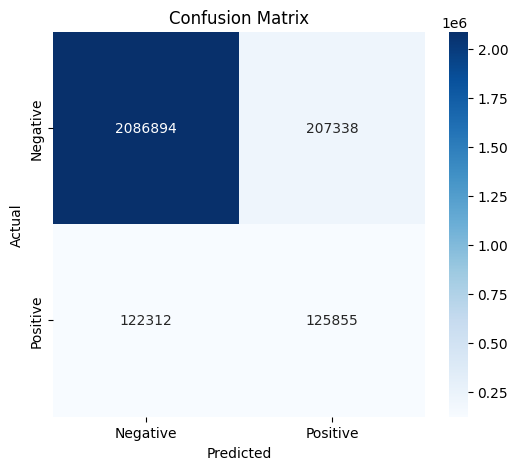

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()